# Adaboost

This notebook contains code that runs the Adaboost fusion method mentioned in the report.

In [2]:
%cd /content/drive/Shareddrives/ML\ Final\ Project
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

/content/drive/Shareddrives/ML Final Project


In [3]:
# Generating Confusion Matrices
def cv_confusion_matrix(model, X, y, folds=5):
    ''' Generates confusion matrix given a classifier '''
    skf = StratifiedKFold(n_splits=folds)
    cv_iter = skf.split(X, y)
    cms = np.zeros((2,2), dtype=int)

    true_labels = []
    pred_labels = []

    for train, test in cv_iter:
        model.fit(X[train], y[train])
        
        cm = confusion_matrix(y[test], [0 if pred < 0.5 else 1 for pred in model.predict(X[test])])

        #true_labels += y[test]
        true_labels = np.concatenate((true_labels, y[test]), axis = None)
        #pred_labels += [0 if pred < 0.5 else 1 for pred in model.predict(X[test])]
        pred_labels = np.concatenate((pred_labels, [0 if pred < 0.5 else 1 for pred in model.predict(X[test])]), axis = None)

        cms = np.add(cms, cm)

    return cms, true_labels, pred_labels

def plot_cm(cm, title, save_name = "CNN/CNN_cm_img.png"):
    df_cm = pd.DataFrame(cm, range(2), range(2))

    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = 'd') # font size

    plt.title(title)
    plt.savefig(save_name)
    plt.show()

## Loading the Data

In [4]:
# Load each training split:
Xtrain = np.load("xray_dataset_pooled/train_processed.npy")
Ytrain = np.load("xray_dataset_pooled/train_labels.npy")

# Load each validation split:
Xval = np.load("xray_dataset_pooled/val_processed.npy")
Yval = np.load("xray_dataset_pooled/val_labels.npy")

# Load testing sets:
Xtest = np.load("xray_dataset_pooled/test_processed.npy")
Ytest = np.load("xray_dataset_pooled/test_labels.npy")

## Choosing the Number of Estimators
The below code runs Adaboost models with different numbers of estimators and then prints and plots the accuracy of each model.

Cross Validation with 40 Estimators

Latest acc =  0.9459355828220859 

Cross Validation with 50 Estimators

Latest acc =  0.9497699386503068 

Cross Validation with 75 Estimators

Latest acc =  0.9589723926380368 

Cross Validation with 100 Estimators

Latest acc =  0.9629984662576687 



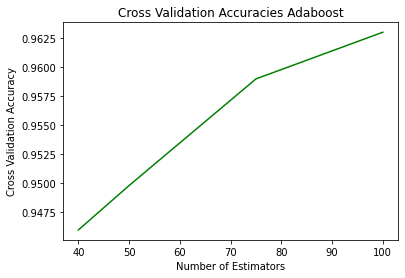

In [5]:
# Test different numbers of estimators:
n_ests = [5, 15, 30, 40, 50, 75, 100]

acc_scores = []

for n in n_ests:
  aboost = AdaBoostClassifier(n_estimators = n)
  print("Cross Validation with {} Estimators\n".format(n))
  cm, pred_labels, true_labels = cv_confusion_matrix(aboost, Xtrain, Ytrain, folds = 5)
  acc_scores.append(accuracy_score(true_labels, pred_labels))
  print("Latest acc = ", acc_scores[-1], "\n")

plt.plot(n_ests, acc_scores, c = "green")
plt.title("Cross Validation Accuracies Adaboost")
plt.xlabel("Number of Estimators")
plt.ylabel("Cross Validation Accuracy")
plt.show()

Based on the results from the above analysis, I determined that 30 classifiers would offer sufficient accuracy while avoiding long run times. In the below block of code, I train an Adaboost model with 30 classifiers:

Time training: 521.7134866714478
Time testing: 1.705958366394043
[[ 76 158]
 [ 10 380]]


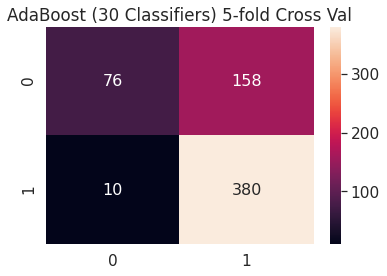

In [7]:
start = time.time()
aboost = AdaBoostClassifier(n_estimators = 30)
aboost.fit(Xtrain, Ytrain)
print("Time training:", time.time() - start)

start = time.time()
class_predictions = aboost.predict(Xtest)
print("Time testing:", time.time() - start)

print(confusion_matrix(Ytest, class_predictions))
plot_cm(confusion_matrix(Ytest, class_predictions), "AdaBoost (30 Classifiers) 5-fold Cross Val", save_name = "Fusion/AdaBoost30_test.png")

Performing cross validation on the training set alone:

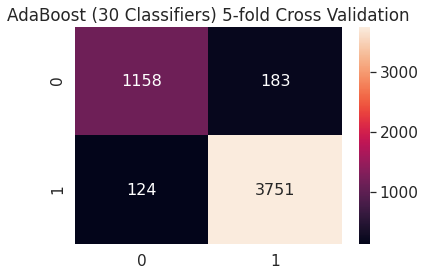

In [ ]:
cm = cv_confusion_matrix(AdaBoostClassifier(n_estimators = 30), \
                        Xtrain, Ytrain, folds = 5)
plot_cm(cm, "AdaBoost (30 Classifiers) 5-fold Cross Validation", save_name = "Fusion/AdaBoost_30cm.png")
